In [915]:
import numpy as np 
import pandas as pd 
#import os
#import statsmodels.formula.api as stats
#from statsmodels.formula.api import ols
import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
import plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

In [916]:
WHR_2019 = pd.read_csv("2019.csv")


WHR_2019.columns = ['Rank', 'Country', 'Score','GDP_Per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 
                    'Freedom_to_Make_Life_Choices', 'Generosity', 'Perceptions_of_Corruption']
                    

In [917]:
WHR_2021 = pd.read_csv("world-happiness-report-2021.csv")


WHR_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [918]:
WHR_2019

,Rank,Country,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [919]:
WHR_2019.describe()

,Rank,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [920]:
# Get list of countries

country_list_2019 = WHR_2019['Country'].tolist()
print(country_list_2019)

['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria', 'Australia', 'Costa Rica', 'Israel', 'Luxembourg', 'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States', 'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico', 'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar', 'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador', 'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland', 'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua', 'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait', 'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica', 'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia', 'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal', 'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya', 'Montenegro', 'Tajikistan', 'Croatia', 'Hong Kong', 'Dominican Republic', 'Bosnia and Herzegovina', 'Turkey', 'Malaysia', 'Bel

In [921]:
WHR_2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [922]:
# Get list of countries in 2021 data

country_list_2021 = WHR_2021['Country name'].tolist()
print(country_list_2021)

['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands', 'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria', 'Australia', 'Israel', 'Germany', 'Canada', 'Ireland', 'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States', 'Belgium', 'France', 'Bahrain', 'Malta', 'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia', 'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore', 'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania', 'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland', 'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador', 'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand', 'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras', 'Croatia', 'Philippines', 'South Korea', 'Peru', 'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan', 'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro', 'Dominican Republic', 'North Cyprus', 'Belarus', 'Russia', 'Hong Kong S.A.R. of China', 'Tajikistan',

In [923]:
# Since less countries participated in 2021, I am creating a separate list to find which countries did not participate
# Then I will exclude them from my final model

list_shared = []
for item in country_list_2019:
  if item in country_list_2021:
    list_shared.append(item)

print(list_shared)

['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria', 'Australia', 'Costa Rica', 'Israel', 'Luxembourg', 'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States', 'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico', 'France', 'Chile', 'Guatemala', 'Saudi Arabia', 'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador', 'Italy', 'Bahrain', 'Slovakia', 'Poland', 'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua', 'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait', 'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica', 'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia', 'Hungary', 'Paraguay', 'Peru', 'Portugal', 'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya', 'Montenegro', 'Tajikistan', 'Croatia', 'Dominican Republic', 'Bosnia and Herzegovina', 'Turkey', 'Malaysia', 'Belarus', 'Greece', 'Mongolia', 'North Macedonia', 'Nigeria', 'Kyrgyzstan',

In [924]:
# Create new dataframes that contain the same countries

WHR_2019 = WHR_2019[WHR_2019['Country'].isin(list_shared)]
drop_rank = WHR_2019.drop(['Rank'], axis = 1)

WHR_2021 = WHR_2021[WHR_2021['Country name'].isin(list_shared)]


In [925]:
correlation_matrix = drop_rank.corr()
correlation_happy = go.Heatmap(z=np.array(correlation_matrix), x=correlation_matrix.columns, y=corr_matrix_happy.columns)
happy_heatmap = [correlation_happy]
iplot(happy_heatmap)

In [926]:
from sklearn.linear_model import LinearRegression

dropped_country_name = drop_rank.drop('Country', axis = 1)

dropped_country_name.head()

# Drop names of countries since it is not a numerical variable.

,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


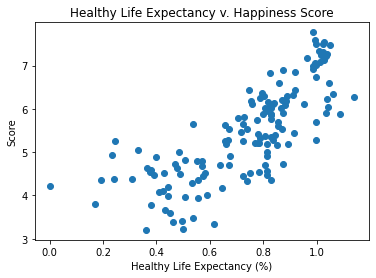

In [927]:
# Chose the feature with the highest correlation given the heatmap to train and test

# Here we can see the relationship between healthy life expectancy and a country's happiness score

plt.scatter(dropped_country_name['Healthy_Life_Expectancy'], dropped_country_name['Score'])
plt.title('Healthy Life Expectancy v. Happiness Score')
plt.xlabel('Healthy Life Expectancy (%)')
plt.ylabel('Score')
plt.show()

In [928]:
happiness_X = dropped_country_name['Healthy_Life_Expectancy']

happiness_Y = dropped_country_name['Score']

In [929]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

In [930]:
clf.fit(happiness_X.values.reshape(-1,1), happiness_Y.values.reshape(-1,1))

LinearRegression()

In [931]:
y_pred = clf.predict(happiness_X.values.reshape(-1,1))

y_pred

array([[6.36610359],
       [6.40256231],
       [6.51923021],
       [6.51193847],
       [6.41349992],
       [6.60673114],
       [6.44995865],
       [6.51193847],
       [6.55933481],
       [6.47547975],
       [6.54839719],
       [6.28224853],
       [6.52287609],
       [6.46089626],
       [6.40256231],
       [6.41349992],
       [6.36974946],
       [6.36610359],
       [5.95776592],
       [6.12547603],
       [5.77911819],
       [6.41349992],
       [5.91036958],
       [6.58121004],
       [6.12547603],
       [5.49109429],
       [5.66974202],
       [6.64318986],
       [6.08901731],
       [5.69526313],
       [6.01974574],
       [6.93121376],
       [5.64786679],
       [6.55933481],
       [5.9468283 ],
       [5.98328702],
       [5.99422464],
       [5.52755301],
       [5.75359708],
       [5.83745214],
       [6.24578981],
       [5.81557691],
       [5.53484476],
       [5.98328702],
       [5.77911819],
       [6.57027242],
       [5.93589068],
       [5.717

In [932]:
clf.score(happiness_X.values.reshape(-1,1), happiness_Y.values.reshape(-1,1))

# Here we can see that the accuracy of our model is roughly 56%. It's above 50% so it's not terrible, and it is a
# linear regression, so we cannot expect a line to perfectly explain a nonlinear relationship

0.5998322378440006

In [933]:
r2 = sklearn.metrics.r2_score(happiness_Y, y_pred, sample_weight=None, multioutput='uniform_average')

print(r2)

0.5998322378440006


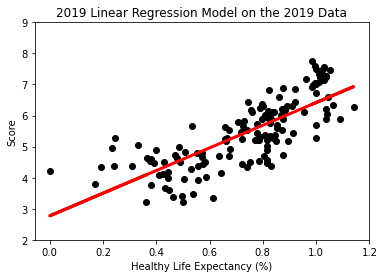

In [934]:
# Our data points juxtaposed to our model

plt.scatter(happiness_X, happiness_Y,  color = 'black')
plt.plot(happiness_X, y_pred, color = 'red', linewidth = 3)

plt.xticks(np.arange(0, 1.4, .2))
plt.yticks(np.arange(2,10,1))
plt.title('2019 Linear Regression Model on the 2019 Data')
plt.xlabel('Healthy Life Expectancy (%)')
plt.ylabel('Score')
plt.show()

In [935]:
# NOW WORKING WITH 2021 DATA

filter_df = WHR_2021.filter(['Ladder score', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy',
                            'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption'], axis=1)

In [936]:
filter_df.columns = ['Score','GDP_Per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 
                    'Freedom_to_Make_Life_Choices', 'Generosity', 'Perceptions_of_Corruption']

In [937]:
filter_df.describe()

,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.528262,0.966207,0.790069,0.513434,0.498841,0.177621,0.133669
std,1.084829,0.403933,0.261266,0.211462,0.139439,0.099443,0.114396
min,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.834000,0.665000,0.638000,0.341000,0.409000,0.103000,0.059000
50%,5.534000,1.008000,0.831000,0.565000,0.516000,0.163000,0.097000
75%,6.255000,1.304000,0.996000,0.653000,0.606000,0.241000,0.170000
max,7.842000,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000


In [938]:
happiness_X2 = filter_df['Healthy_Life_Expectancy']

happiness_Y2 = filter_df['Score']

In [939]:
happiness_X2.describe()

count    145.000000
mean       0.513434
std        0.211462
min        0.000000
25%        0.341000
50%        0.565000
75%        0.653000
max        0.897000
Name: Healthy_Life_Expectancy, dtype: float64

In [940]:
new_r2 = sklearn.metrics.r2_score(happiness_Y2, y_pred, sample_weight=None, multioutput='uniform_average')

print(new_r2)

0.5875893671591712


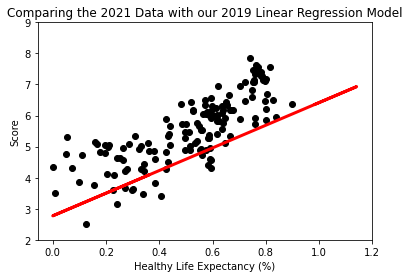

In [941]:
# Our 2021 data points juxtaposed to the model generated from 2019 data

plt.scatter(happiness_X2, happiness_Y2,  color = 'black')
plt.plot(happiness_X, y_pred, color = 'red', linewidth = 3)

plt.xticks(np.arange(0, 1.4, .2))
plt.yticks(np.arange(2,10,1))
plt.title('Comparing the 2021 Data with our 2019 Linear Regression Model')
plt.xlabel('Healthy Life Expectancy (%)')
plt.ylabel('Score')
plt.show()

In [942]:
# IMPLEMENT POLYNOMIAL REGRESSION

from sklearn.preprocessing import PolynomialFeatures


# dropped_country_name from WHR_2019
sum_vals = dropped_country_name['Healthy_Life_Expectancy'] + dropped_country_name['GDP_Per_Capita'] + dropped_country_name['Healthy_Life_Expectancy'] + dropped_country_name['Social_Support'] + dropped_country_name['Freedom_to_Make_Life_Choices'] + dropped_country_name['Generosity'] + dropped_country_name['Perceptions_of_Corruption']


poly_happiness_Y = dropped_country_name['Score']

In [943]:
sum_vals

0      6.041
1      6.202
2      6.341
3      6.119
4      6.093
       ...  
149    2.491
150    2.704
151    3.481
152    3.199
153    1.772
Length: 145, dtype: float64

In [976]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(sum_vals.values.reshape(-1,1))
clf.fit(X_poly, poly_happiness_Y.values.reshape(-1,1))

LinearRegression()

In [977]:
sum_vals.describe()


count    145.000000
mean       4.291552
std        1.137913
min        1.772000
25%        3.609000
50%        4.436000
75%        5.059000
max        6.597000
dtype: float64

In [978]:
poly_y_pred = clf.predict(X_poly)

poly_y_pred

array([[7.17475099],
       [7.20410594],
       [7.17798086],
       [7.19631399],
       [7.19059466],
       [7.19947526],
       [7.19364264],
       [7.20404387],
       [7.19741828],
       [7.09520112],
       [7.20311659],
       [6.36744427],
       [6.74541405],
       [7.2008864 ],
       [7.12782034],
       [7.20331451],
       [7.0509929 ],
       [6.92520696],
       [6.74202429],
       [6.28722367],
       [6.74766961],
       [7.1097139 ],
       [5.70258485],
       [6.86701593],
       [6.06425431],
       [5.27975892],
       [6.10849835],
       [6.72838929],
       [6.22748431],
       [5.60898986],
       [6.33469102],
       [6.97834964],
       [5.12909626],
       [6.47461288],
       [6.59215091],
       [6.08168553],
       [6.19014055],
       [6.07900384],
       [5.79392681],
       [5.68320251],
       [6.68678284],
       [5.3983715 ],
       [5.32326849],
       [5.93708475],
       [5.57361713],
       [6.38179378],
       [5.67160879],
       [6.329

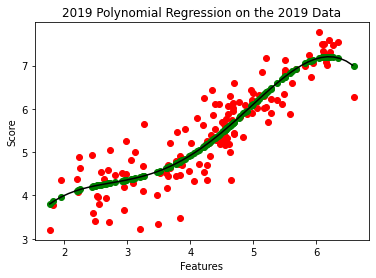

In [993]:
X_grid = np.arange(min(sum_vals), max(sum_vals), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sum_vals, poly_happiness_Y, color = 'red')
plt.scatter(sum_vals, poly_y_pred, color = 'green')
plt.plot(X_grid, clf.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title('2019 Polynomial Regression on the 2019 Data')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

In [980]:
sum_vals_r2 = sklearn.metrics.r2_score(poly_happiness_Y, poly_y_pred, sample_weight=None, multioutput='uniform_average')

print(sum_vals_r2)

0.8058999968317295


In [981]:
filter_df.describe()

,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.528262,0.966207,0.790069,0.513434,0.498841,0.177621,0.133669
std,1.084829,0.403933,0.261266,0.211462,0.139439,0.099443,0.114396
min,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.834000,0.665000,0.638000,0.341000,0.409000,0.103000,0.059000
50%,5.534000,1.008000,0.831000,0.565000,0.516000,0.163000,0.097000
75%,6.255000,1.304000,0.996000,0.653000,0.606000,0.241000,0.170000
max,7.842000,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000


In [982]:
dropped_country_name.describe()

,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.446766,0.912834,1.225717,0.733841,0.396248,0.180324,0.108745
std,1.092132,0.377801,0.274640,0.232000,0.138809,0.096139,0.095007
min,3.203000,0.046000,0.437000,0.000000,0.000000,0.000000,0.000000
25%,4.559000,0.642000,1.058000,0.555000,0.311000,0.107000,0.047000
50%,5.386000,0.960000,1.274000,0.795000,0.417000,0.175000,0.082000
75%,6.182000,1.221000,1.455000,0.881000,0.508000,0.247000,0.135000
max,7.769000,1.609000,1.624000,1.141000,0.631000,0.566000,0.453000


In [983]:
# Creating sum_vals but for 2021 data to see how model predicts 2021 happiness

sum_vals_2021 = filter_df['GDP_Per_Capita'] + filter_df['Healthy_Life_Expectancy'] + filter_df['Social_Support'] + filter_df['Freedom_to_Make_Life_Choices'] + filter_df['Generosity'] + filter_df['Perceptions_of_Corruption']
X_poly_2021 = poly_reg.fit_transform(sum_vals_2021.values.reshape(-1,1))

Y_vals_2021 = filter_df['Score']

In [984]:
Y_vals_2021.describe()

count    145.000000
mean       5.528262
std        1.084829
min        2.523000
25%        4.834000
50%        5.534000
75%        6.255000
max        7.842000
Name: Score, dtype: float64

In [985]:
sum_vals_2021.describe()

count    145.000000
mean       3.079841
std        0.937056
min        0.628000
25%        2.414000
50%        3.156000
75%        3.683000
max        4.998000
dtype: float64

In [986]:
X_poly_2021

array([[1.00000000e+00, 4.58900000e+00, 2.10589210e+01, 9.66393885e+01,
        4.43478154e+02],
       [1.00000000e+00, 4.75200000e+00, 2.25815040e+01, 1.07307307e+02,
        5.09924323e+02],
       [1.00000000e+00, 4.73100000e+00, 2.23823610e+01, 1.05890950e+02,
        5.00970084e+02],
       [1.00000000e+00, 4.58700000e+00, 2.10405690e+01, 9.65130900e+01,
        4.42705544e+02],
       [1.00000000e+00, 4.66600000e+00, 2.17715560e+01, 1.01586080e+02,
        4.74000651e+02],
       [1.00000000e+00, 4.81200000e+00, 2.31553440e+01, 1.11423515e+02,
        5.36169956e+02],
       [1.00000000e+00, 4.68000000e+00, 2.19024000e+01, 1.02503232e+02,
        4.79715126e+02],
       [1.00000000e+00, 4.67200000e+00, 2.18275840e+01, 1.01978472e+02,
        4.76443423e+02],
       [1.00000000e+00, 4.66500000e+00, 2.17622250e+01, 1.01520780e+02,
        4.73594437e+02],
       [1.00000000e+00, 4.48300000e+00, 2.00972890e+01, 9.00961466e+01,
        4.03901025e+02],
       [1.00000000e+00, 4.5850

In [987]:
y_pred_2021 = clf.predict(X_poly_2021)

y_pred_2021

array([[5.56733392],
       [5.77686135],
       [5.7493879 ],
       [5.56482354],
       [5.66517973],
       [5.85595517],
       [5.68320251],
       [5.67289563],
       [5.66389495],
       [5.43673622],
       [5.56231482],
       [4.9918371 ],
       [5.25944307],
       [5.47928226],
       [5.70906169],
       [4.67354374],
       [5.41868763],
       [4.78881084],
       [5.06037348],
       [4.89813971],
       [5.08566469],
       [4.93764826],
       [5.2639411 ],
       [5.05436669],
       [4.77708973],
       [4.90433208],
       [4.6782698 ],
       [4.98992897],
       [4.37713811],
       [4.78097854],
       [6.10447711],
       [4.42151404],
       [4.6300621 ],
       [4.47206617],
       [4.48990627],
       [4.41565976],
       [4.64015902],
       [4.64914078],
       [5.00334472],
       [4.66419617],
       [4.68645296],
       [4.55720855],
       [4.70383243],
       [4.69058315],
       [4.47033201],
       [4.71233416],
       [4.50867938],
       [4.351

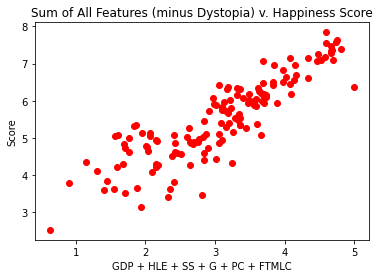

In [988]:
plt.scatter(sum_vals_2021, Y_vals_2021, color = 'red')

plt.title('Sum of All Features (minus Dystopia) v. Happiness Score')
plt.xlabel('GDP + HLE + SS + G + PC + FTMLC')
plt.ylabel('Score')
plt.show()

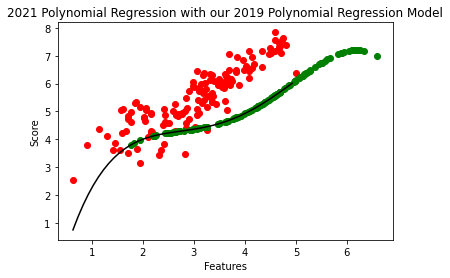

In [992]:
# Our 2021 data points juxtaposed to the model generated from 2019 data

X_grid = np.arange(min(sum_vals_2021), max(sum_vals_2021), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sum_vals_2021, Y_vals_2021, color = 'red')
plt.scatter(sum_vals, poly_y_pred, color = 'green')
plt.plot(X_grid, clf.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title('2021 Polynomial Regression with our 2019 Polynomial Regression Model')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

In [990]:
r2_poly_2021 = sklearn.metrics.r2_score(Y_vals_2021, poly_y_pred, sample_weight=None, multioutput='uniform_average')

print(r2_poly_2021)

0.7764594991564677


In [994]:
rmse_2021 = sklearn.metrics.mean_squared_error(Y_vals_2021, poly_y_pred)

print(rmse_2021)

0.26126015152265364


In [996]:
rmse_2019 = sklearn.metrics.mean_squared_error(happiness_Y2, y_pred)

print(rmse_2019)

0.48199974509749266
